In [1]:
# filter some warning messages
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import numpy as np
import xesmf as xe
import xarray as xr
import pandas as pd

import gsw
import os
import pickle

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import matplotlib.path as mpath

from scipy import ndimage
from skimage import measure
from skimage.segmentation import flood_fill

In [4]:
datapd = pd.read_csv("dataset_st.csv")

In [7]:
datapd = pd.read_csv("all_coord.csv")

In [5]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [7]:
plt.ioff()

for i in range(0, len(datapd)):
    fpath = 'data_mld2000/' + datapd.at[i, 'source_id'] + '.' + datapd.at[i, 'grid_label'] + '.pickle'

    pltd_name = 'pdata/' + datapd.at[i, 'source_id'] + '.pickle'

    if os.path.exists(fpath):

        with open(fpath, 'rb') as f:
            data_dict = pickle.load(f)
        
        # print(data_dict['name'])
        pltd = data_dict['pltd']
        pltx = data_dict['pltx']
        plty = data_dict['plty']
            
        fig = plt.figure()
        ax = plt.axes(projection=ccrs.SouthPolarStereo())
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree());
        
        if len(np.shape(pltx)) > 2:
            pltx = pltx.isel(time = 0)
            plty = plty.isel(time = 0)
        
        try:
            im = ax.pcolormesh(pltx, plty, pltd, transform=ccrs.PlateCarree())
            ax.add_feature(cfeature.LAND, zorder=1, color='0.8')
            ax.add_feature(cfeature.COASTLINE, linewidth=1)
            ax.set_boundary(circle, transform=ax.transAxes)
            cbar = plt.colorbar(im) 
            fig.savefig('fig_mld_test/{}.{}.png'.format(datapd.at[i, 'source_id'], datapd.at[i, 'grid_label']))
        except Exception as e:
            print(i, data_dict['name'], ':', e)
            
            # gl = ax.gridlines(
            #     xlocs = np.arange(-180,180,30), 
            #     ylocs = np.arange(-90,90,20),
            #     draw_labels=True, y_inline=True)

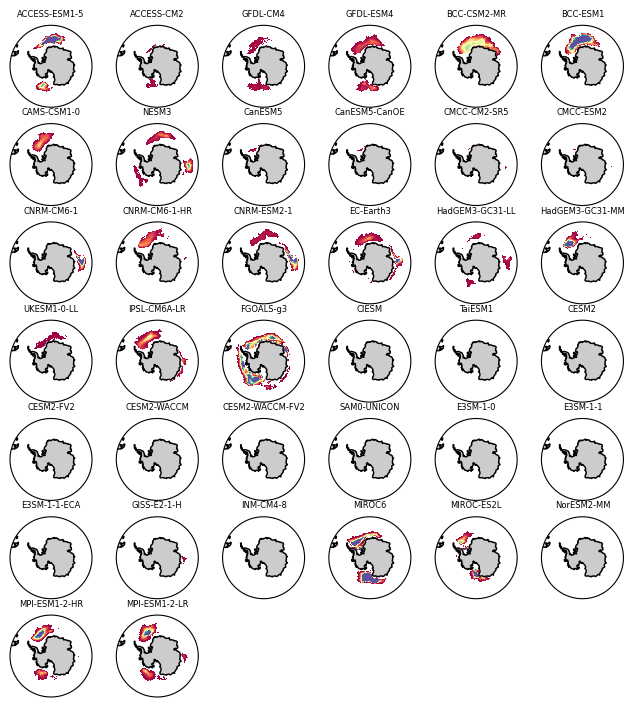

In [8]:
fig = plt.figure(figsize=(8,10))
n = 1

for i in range(0, len(datapd)):
    fpath = 'data_mld2000/' + datapd.at[i, 'source_id'] + '.' + datapd.at[i, 'grid_label'] + '.pickle'

    pltd_name = 'pdata/' + datapd.at[i, 'source_id'] + '.pickle'
    if os.path.exists(fpath):
        if not os.path.exists(pltd_name):
            continue

        with open(fpath, 'rb') as f:
            data_dict = pickle.load(f)
        
        # print(data_dict['name'])
        pltd = data_dict['pltd']
        pltx = data_dict['pltx']
        plty = data_dict['plty']

        ax = fig.add_subplot(8, 6, n, projection=ccrs.SouthPolarStereo())
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
        
        # gl = ax.gridlines(
        #     xlocs = np.arange(-180,180,90), 
        #     ylocs = np.arange(-90,90,20),
        #     draw_labels=False, y_inline=True)
            
        ax.set_title('{}'.format(datapd.at[i, 'source_id']), fontsize=6)
                
        im = ax.pcolormesh(pltx, plty, pltd, 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=0.5, cmap=plt.cm.Spectral)
        
        
        ax.add_feature(cfeature.LAND, zorder=1, color='0.8')
        ax.add_feature(cfeature.COASTLINE, linewidth=1)
        ax.set_boundary(circle, transform=ax.transAxes)
        
        n = n+1
    # fig.colorbar(im)
    # fig.colorbar(im2)
    #         fig.savefig('fig_siconc_test2/{}.{}.png'.format(datapd.at[i, 'source_id'], datapd.at[i, 'grid_label']))
